# 신경망

## 파이토치와 경사법

### 파이토치 설치

In [1]:
# !pip install torch

In [2]:
import torch

torch.__version__

'2.5.0'

In [3]:
# GPU 사용 가능 여부 확인
print('CUDA 사용 가능 여부:', torch.cuda.is_available())

if torch.cuda.is_available():
    print('현재 사용 중인 GPU:', torch.cuda.get_device_name(0))
    print('사용 가능한 GPU 개수:', torch.cuda.device_count())


CUDA 사용 가능 여부: True
현재 사용 중인 GPU: NVIDIA GeForce RTX 3090
사용 가능한 GPU 개수: 1


### 텐서 계산

In [4]:
import torch

x = torch.tensor(5.0)

y = 3*x**2

print(y)

tensor(75.)


In [5]:
x = torch.tensor(5.0, requires_grad=True)
y = 3*x**2
y.backward()
print(x.grad)

tensor(30.)


### 경사법

In [6]:
import torch

def rosenbrock(x0, x1):
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    return y

x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)

tensor(-2.) tensor(400.)


In [7]:
# 학습률 설정
lr = 0.001  # learning rate
iters = 10000  # iteration count

# 반복 학습
for i in range(iters):
    # 1000번마다 현재 값 출력
    if i % 1000 == 0:
        print(x0.item(), x1.item())

    # Rosenbrock 함수 계산
    y = rosenbrock(x0, x1)

    # 기울기 계산
    y.backward()

    # 경사하강법으로 파라미터 갱신
    x0.data -= lr * x0.grad.data
    x1.data -= lr * x1.grad.data

    # 기울기 초기화
    x0.grad.zero_()
    x1.grad.zero_()

# 최종 결과 출력
print(x0.item(), x1.item())

0.0 2.0
0.6815015077590942 0.46292299032211304
0.8253857493400574 0.6804871559143066
0.8942827582359314 0.7992911338806152
0.9331904053688049 0.8705660700798035
0.9568046927452087 0.9152978658676147
0.9716982245445251 0.9440822601318359
0.9813036918640137 0.9628812670707703
0.98758465051651 0.9752733111381531
0.9917276501655579 0.983490526676178
0.9944759607315063 0.9889602065086365


## 선형 회귀

### 토이 데이터셋

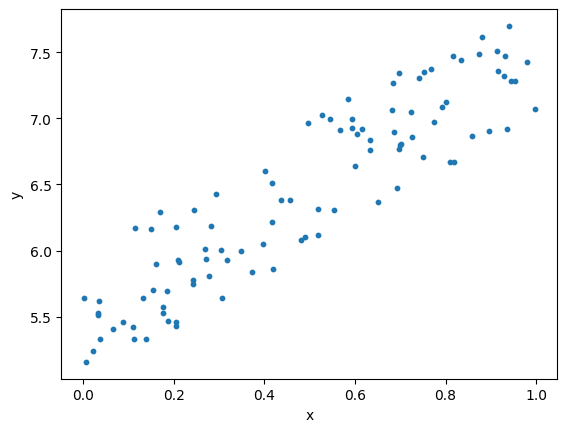

In [8]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
plt.xlabel('x')
plt.ylabel('y') 
plt.show()

### 선형 회귀 구현

In [28]:
import torch

torch.manual_seed(0)
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

y = torch.tensor(y, dtype=torch.float32)

W = torch.zeros((1, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def predict(x):
    y = x @ W + b
    return y


/tmp/ipykernel_6032/1810023893.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [29]:
import torch.nn.functional as F

# 평균 제곱 오차를 계산하는 함수
def mean_squared_error(x0, x1):
    diff = x0 - x1  # 예측값과 실제값의 차이
    N = len(diff)   # 데이터 개수
    return torch.sum(diff ** 2) / N  # 차이의 제곱의 평균

# 학습률과 반복 횟수 설정
lr = 0.1           # 학습률(learning rate)
iters = 100        # 반복 횟수(iterations)

# 학습 루프
for i in range(iters):
    y_hat = predict(x)    # 예측값 계산

    # loss = mean_squared_error(y, y_hat)  # 손실 계산
    loss = F.mse_loss(y, y_hat)

    loss.backward()       # 역전파로 기울기 계산

    # 경사하강법으로 매개변수 갱신
    W.data -= lr * W.grad.data  # 가중치 갱신
    b.data -= lr * b.grad.data  # 편향 갱신

    # 기울기 초기화
    W.grad.zero_()  # 가중치의 기울기 초기화
    b.grad.zero_()  # 편향의 기울기 초기화

    # 10회 반복마다 손실 출력
    if i % 10 == 0:
        print(loss.item())

# 최종 결과 출력
print(loss.item())        # 최종 손실값
print('====')
print('W =', W.item())    # 학습된 가중치
print('b =', b.item())    # 학습된 편향

41.89796447753906
0.22483211755752563
0.0925208106637001
0.0888015553355217
0.08627457916736603
0.08435674756765366
0.0829005315899849
0.0817948430776596
0.08095530420541763
0.08031783998012543
0.07987643033266068
====
W = 2.2863590717315674
b = 5.3144850730896


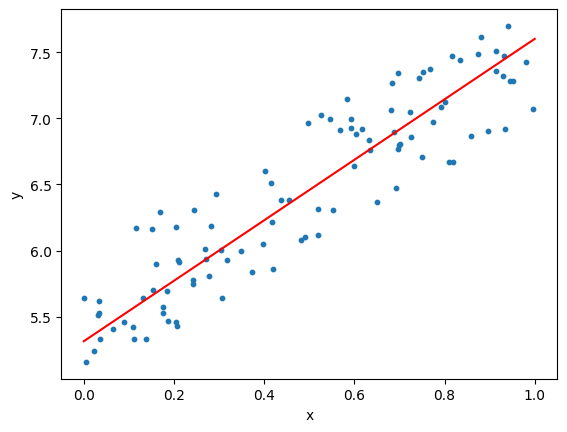

In [30]:
# plot
import matplotlib.pyplot as plt
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
x = torch.tensor([[0.0], [1.0]])
y = W.detach().numpy() * x.detach().numpy() + b.detach().numpy()
plt.plot(x, y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 매개변수와 옵티마이저

### Parameter 클래스와 Module 클래스

In [32]:
import torch
import torch.nn as nn

W = nn.Parameter(torch.zeros(1, 1))
b = nn.Parameter(torch.zeros(1))

print(W)
print(b)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [33]:
# 신경망 모델 정의
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.W = nn.Parameter(torch.zeros(1, 1))  # 가중치 매개변수 초기화
        self.b = nn.Parameter(torch.zeros(1))     # 편향 매개변수 초기화

    def forward(self, x):
        y = x @ self.W + self.b   # 선형 회귀 연산 수행
        return y

# 모델 인스턴스 생성
model = Model()

# 모델의 모든 매개변수 출력
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


In [34]:
# 신경망 모델을 정의합니다
class Model(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        # 부모 클래스의 초기화 메서드를 호출합니다
        super().__init__()
        # 선형 계층을 생성합니다. input_size 크기의 입력을 받아 output_size 크기의 출력을 생성합니다
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        # 입력 x에 대해 선형 변환을 수행합니다
        y = self.linear(x)
        return y

# Model 클래스의 인스턴스를 생성합니다
model = Model()

# 모델의 모든 학습 가능한 매개변수를 출력합니다
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[0.0421]], requires_grad=True)
Parameter containing:
tensor([0.6446], requires_grad=True)


### 옵티마이저

In [35]:
x = torch.rand(100, 1)
y = 5 + 2 * x + torch.rand(100, 1)

lr = 0.1
iters = 100

model = Model()

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    y_hat = model(x)
    loss = nn.functional.mse_loss(y, y_hat)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    

## 신경망 구현

### 비선형 데이터셋

$y = \sin(2\pi x) + \epsilon$



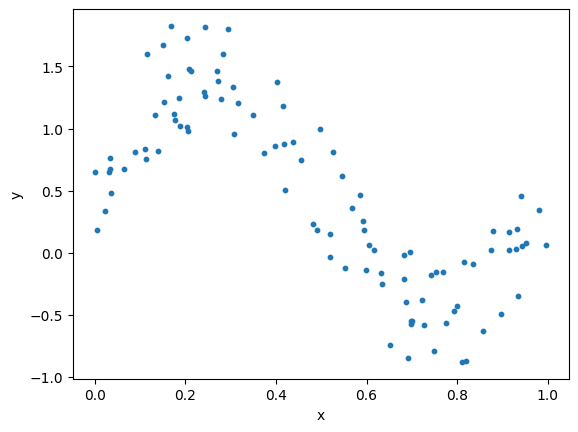

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(0)
x = torch.rand(100, 1)
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 선형 변환과 활성화 함수

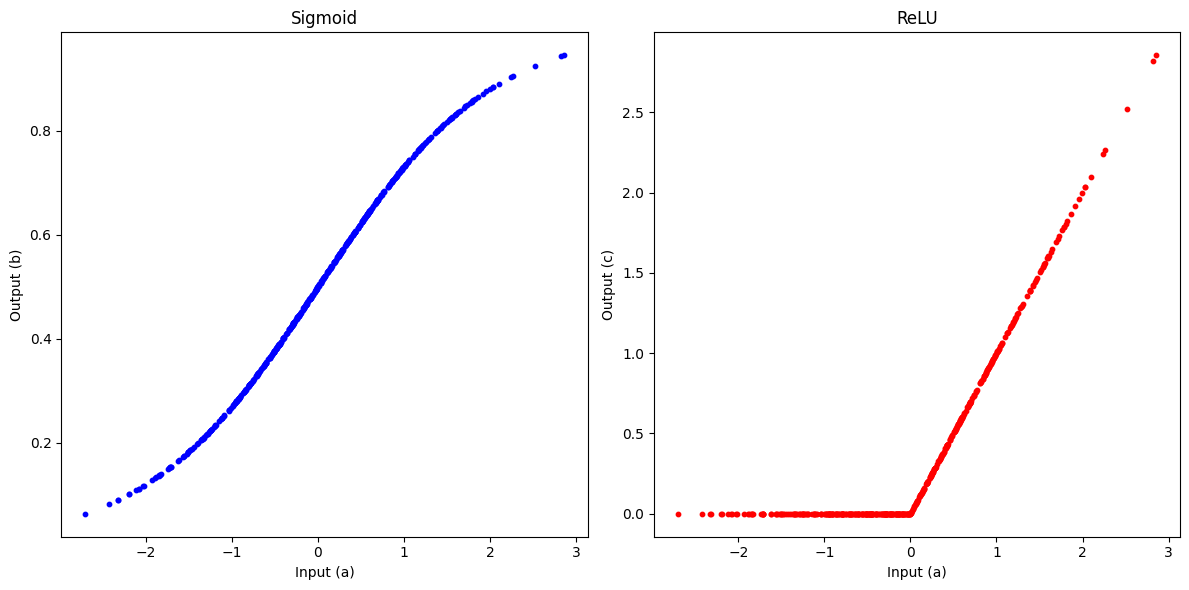

In [47]:
import torch.nn.functional as F

a = torch.randn(100, 5)

b = F.sigmoid(a)
c = F.relu(a)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(a.detach().numpy(), b.detach().numpy(), c='blue', s=10)
ax1.set_title('Sigmoid')
ax1.set_xlabel('Input (a)')
ax1.set_ylabel('Output (b)')

ax2.scatter(a.detach().numpy(), c.detach().numpy(), c='red', s=10)
ax2.set_title('ReLU')
ax2.set_xlabel('Input (a)')
ax2.set_ylabel('Output (c)')

plt.tight_layout()
plt.show()


### 신경망 구현

0.7643452286720276
0.23656320571899414
0.2322607785463333
0.22441409528255463
0.21026141941547394
0.1795787364244461
0.11798442900180817
0.08471601456403732
0.08014969527721405
0.07964840531349182
0.07943300157785416


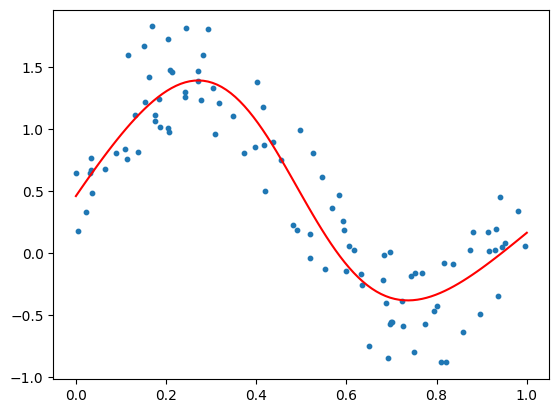

In [49]:
# PyTorch 라이브러리 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F


# 재현성을 위한 시드 설정
torch.manual_seed(0)
# 100개의 무작위 입력 데이터 생성 (0~1 사이)
x = torch.rand(100, 1)
# sin 함수에 노이즈를 추가한 타겟 데이터 생성
y = torch.sin(2 * torch.pi * x) + torch.rand(100, 1)

# 신경망 모델 정의
class Model(nn.Module):
    def __init__(self, input_size=1, hidden_size= 10, output_size=1):
        super().__init__()
        # 입력층에서 은닉층으로의 선형 변환
        self.linear1 = nn.Linear(input_size, hidden_size)
        # 은닉층에서 출력층으로의 선형 변환
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # 첫 번째 선형 변환
        y = self.linear1(x)
        # 활성화 함수(시그모이드) 적용
        y = F.sigmoid(y)
        # 두 번째 선형 변환
        y = self.linear2(y)
        return y


# 학습률 설정
lr = 0.2
# 학습 반복 횟수 설정
iters = 10000

# 모델 인스턴스 생성
model = Model()
# SGD 옵티마이저 설정
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 학습 루프
for i in range(iters):
    # 모델의 예측값 계산
    y_pred = model(x)
    # MSE 손실 계산
    loss = F.mse_loss(y, y_pred)
    # 기존 그래디언트 초기화
    optimizer.zero_grad()
    # 역전파 수행
    loss.backward()
    # 파라미터 업데이트
    optimizer.step()

    # 1000번째 반복마다 손실값 출력
    if i % 1000 == 0:
        print(loss.item())

# 최종 손실값 출력
print(loss.item())

# 결과 시각화
import matplotlib.pyplot as plt
# 원본 데이터 산점도 그리기
plt.scatter(x.detach().numpy(), y.detach().numpy(), s=10)
# 0부터 1까지 균일한 간격의 100개 테스트 포인트 생성
x = torch.linspace(0, 1, 100).reshape(-1, 1)
# 모델 예측값 계산
y = model(x).detach().numpy()
# 예측 곡선 그리기
plt.plot(x, y, color='red')
plt.show()

## 토치비전과 데이터셋

### 토치비전 설치

In [50]:
import torchvision

torchvision.__version__

'0.20.0'

### MNIST 데이터셋

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:12<00:00, 781kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 156kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.54MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.62MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

size: 60000
type: <class 'PIL.Image.Image'>
label: 5


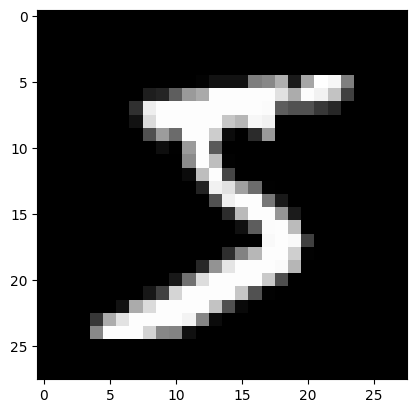

In [51]:
# 필요한 라이브러리 임포트
import torch
import torchvision  # 컴퓨터 비전 관련 도구 모음
import torchvision.transforms as transforms  # 데이터 변환을 위한 도구
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리


# MNIST 데이터셋 로드
dataset = torchvision.datasets.MNIST(
    root='./data',  # 데이터를 저장할 경로
    train=True,     # 학습용 데이터셋 사용
    transform=None, # 데이터 변환 없음
    download=True   # 데이터가 없으면 다운로드
)

# 첫 번째 데이터와 레이블 가져오기
x, label = dataset[0]

# 데이터셋 정보 출력
print('size:', len(dataset))  # 전체 데이터 개수: 60000
print('type:', type(x))      # 데이터 타입: PIL 이미지
print('label:', label)       # 레이블 값: 5

# 이미지 시각화
plt.imshow(x, cmap='gray')   # 흑백 이미지로 표시
plt.show()

### 전처리

In [55]:
# 데이터 전처리
# ToTensor()를 사용하여 PIL 이미지를 텐서로 변환
transform = transforms.ToTensor()

# MNIST 데이터셋 로드 (텐서 변환 적용)
dataset = torchvision.datasets.MNIST(
    root='./data',      # 데이터를 저장할 경로
    train=True,         # 학습용 데이터셋 사용
    transform=transform, # 텐서 변환 적용
    download=True       # 데이터가 없으면 다운로드
)

# 첫 번째 데이터와 레이블 가져오기
x, label = dataset[0]
print('type:', type(x))  # 데이터 타입: torch.Tensor
print('shape:', x.shape)  # 데이터 형상: [1, 28, 28] (채널, 높이, 너비)

type: <class 'torch.Tensor'>
shape: torch.Size([1, 28, 28])


### 데이터 로더

In [53]:
# DataLoader 생성
# - 데이터셋을 미니배치 단위로 로드하기 위한 유틸리티
dataloader = torch.utils.data.DataLoader(
    dataset,        # 로드할 데이터셋
    batch_size=32,  # 미니배치 크기
    shuffle=True)   # 데이터 순서를 섞을지 여부

# 첫 번째 미니배치 데이터 확인
for x, label in dataloader:
    print('x shape:', x.shape)      # 데이터 형상: [배치크기, 채널, 높이, 너비]
    print('label shape:', label.shape)  # 레이블 형상: [배치크기]
    break  # 첫 번째 배치만 확인하고 종료

x shape: torch.Size([32, 1, 28, 28])
label shape: torch.Size([32])
